In [1]:
#Data and plotting imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#Machine learning imports
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [6]:
def plot_decision(X,y,model,n_classes=2):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    model.fit(X, y)
    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='binary_r')
    for class_value in range(n_classes):
        row_ix = np.where(y == class_value)
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')

In [15]:
df = pd.read_csv("data/bodyPerformance.csv")
#Drop missing rows
df = df.dropna()
#Replace wines with "type = white" with 0
df.loc[(df["gender"]=="M"), 'gender'] = 0
#Replace wines with "type = red" with 1
df.loc[(df["gender"]=="F"), 'gender'] = 1
#Sort and get the first 1500 white wines and last 1500 red wines (balances classes)
w = df.sort_values("gender")[0:1500]
r = df.sort_values("gender")[-1500:]
df = pd.concat([w,r])
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [16]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
7933,50.0,0,177.8,69.90,19.6,79.0,133.0,35.8,10.3,37.0,205.0,B
7935,46.0,0,171.5,72.20,19.5,72.0,117.0,48.8,12.0,49.0,209.0,B
7937,30.0,0,178.1,70.10,22.1,93.0,153.0,42.4,18.3,50.0,213.0,B
7939,47.0,0,170.0,79.20,27.6,99.0,151.0,42.8,7.5,35.0,200.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...
8597,48.0,1,165.3,53.30,20.0,80.0,125.0,25.9,19.2,36.0,171.0,A
8596,58.0,1,162.3,55.70,29.9,82.0,133.0,26.3,14.6,20.0,144.0,D
8595,21.0,1,162.3,52.40,23.6,72.0,111.0,28.0,25.8,46.0,177.0,A
1943,22.0,1,169.0,63.40,27.6,77.0,115.0,25.8,24.8,61.0,212.0,A


In [40]:
#Pick two features
feature1 = "sit-ups counts"
feature2 = "broad jump_cm"
#Pick max_depth
max_depth = 3

In [41]:
#Train model, plot decision boundary 
x = df[[feature1,feature2]].values
y = pd.to_numeric(df["gender"])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)
#See if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100
print("Accuracy:", acc)

Accuracy: 87.1111111111111


/var/folders/z3/_m_2tj7n49l9g92rvdd8d7880000gn/T/ipykernel_39562/3444668328.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


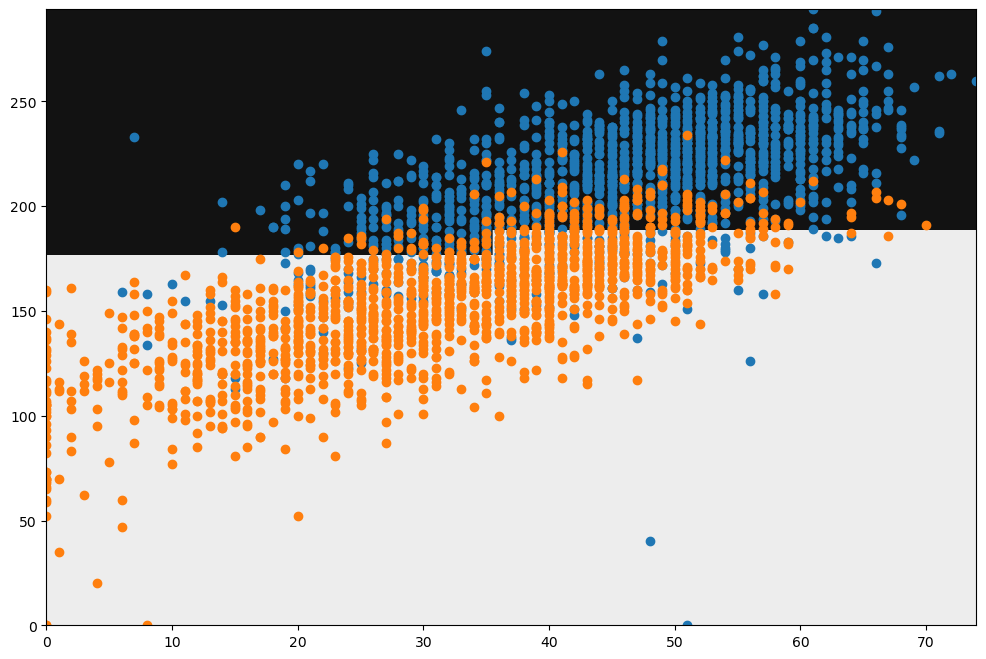

In [42]:
plt.figure(figsize=(12,8))
#Set bounds to min and max values of features 
plt.xlim([np.min(x[:,0]),np.max(x[:,0])])
plt.ylim([np.min(x[:,1]),np.max(x[:,1])])
plot_decision(x, y, model, 2)



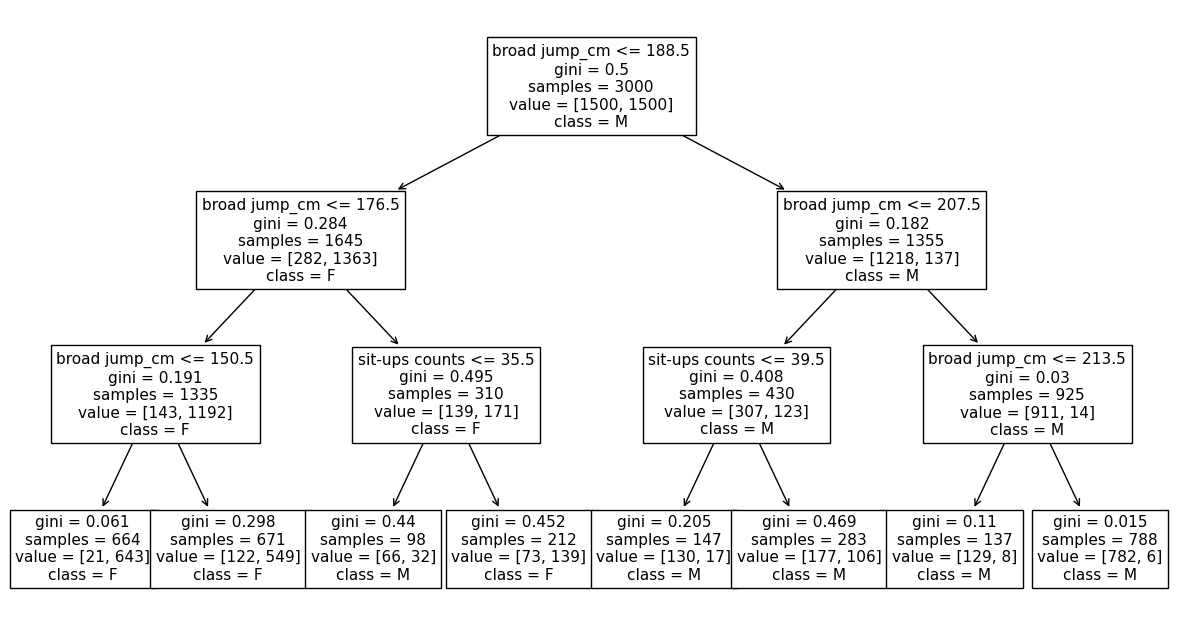

In [44]:
max_depth = 3
plt.figure(figsize=(15,8))
my_tree = plot_tree(model, feature_names=[feature1, feature2],fontsize=11,class_names = ["M","F"]) 
